Import necessary libs:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from   matplotlib.pyplot import cm

# Fix size of all fonts in figures:
plt.rcParams.update({'font.size': 9})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

cm2in = 1/2.54

Plot Residuals

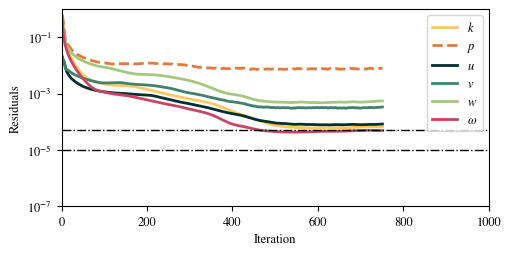

In [16]:
inputData = "./Solver/postProcessing/residuals/0/residuals.dat"
Case = 'CaseJ'

c1 = '#002F32'
c2 = '#42826C'
c3 = '#A5C77F'
c4 = '#FFC861'
c5 = '#C84663'
c6 = '#E27A3F'

# ==============================================

df = pd.read_table(inputData, sep="\s+|	|	", skiprows=3, usecols=[0,1,2,3,4,5,6], engine="python")

residuals = df.to_numpy() # p, ux, uy, uz, k, epsilon

## Plot residuals

fig, ax = plt.subplots(figsize=(14*cm2in, 6.5*cm2in))

# Plot experimental data:
time = residuals[:,0]

ax.semilogy(time, residuals[:,5], '-',  color=c4,  linewidth=2, label = '$k$')
ax.semilogy(time, residuals[:,1], '--', color=c6, linewidth=2, label = '$p$')
ax.semilogy(time, residuals[:,2], '-',  color=c1,  linewidth=2, label = '$u$')
ax.semilogy(time, residuals[:,3], '-',  color=c2,  linewidth=2, label = '$v$')
ax.semilogy(time, residuals[:,4], '-',  color=c3,  linewidth=2, label = '$w$')
ax.semilogy(time, residuals[:,6], '-',  color=c5,  linewidth=2, label = '$\omega$')

ax.semilogy([0, 2200], [5e-5, 5e-5], 'k-.', linewidth=1)
ax.semilogy([0, 2200], [1e-5, 1e-5], 'k-.', linewidth=1)

ax.set_xlabel('Iteration')
ax.set_ylabel('Residuals')
ax.axis([0, 1000, 1e-7 , 1e0])
ax.legend()

plt.savefig("./Residuals_" + Case + ".png", dpi=300, bbox_inches="tight")